In [101]:
import pandas as pd

df = pd.read_csv("Online_Cars_Sale_Marketplace.csv")

# Show all column names
print(df.columns.tolist())


['Year', 'Make', 'Model', 'Used/New', 'Price', 'ConsumerRating', 'ConsumerReviews', 'SellerType', 'SellerName', 'SellerRating', 'SellerReviews', 'StreetName', 'State', 'Zipcode', 'DealType', 'ComfortRating', 'InteriorDesignRating', 'PerformanceRating', 'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating', 'ExteriorColor', 'InteriorColor', 'Drivetrain', 'MinMPG', 'MaxMPG', 'FuelType', 'Transmission', 'Engine', 'VIN', 'Stock#', 'Mileage']


In [103]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Online_Cars_Sale_Marketplace.csv")

# Check the unique values in 'Used/New'
print("Original unique values in 'Used/New':")
print(df['Used/New'].unique())

# Clean the column: normalize certified values
df['Used/New'] = df['Used/New'].str.strip()  # remove extra spaces
df['Used/New'] = df['Used/New'].replace(
    to_replace=r'(?i).*certified.*', value='Certified', regex=True
)

# Display cleaned categories
print("\nCleaned unique values in 'Used/New':")
print(df['Used/New'].unique())

# Count how many of each type
print("\nCount of each Used/New type:")
print(df['Used/New'].value_counts())


Original unique values in 'Used/New':
['Used' 'Dodge Certified' 'Acura Certified' 'Honda Certified'
 'Mercedes-Benz Certified' 'Ford Certified' 'Toyota Certified'
 'BMW Certified' 'Porsche Certified' 'Cadillac Certified'
 'Volvo Certified' 'Nissan Certified' 'Subaru Certified'
 'Volkswagen Certified' 'INFINITI Certified' 'Chevrolet Certified'
 'Kia Certified' 'RAM Certified' 'Jeep Certified' 'GMC Certified'
 'Buick Certified' 'Alfa Romeo Certified' 'Bentley Certified'
 'MINI Certified' 'Ferrari Certified' 'Maserati Certified']

Cleaned unique values in 'Used/New':
['Used' 'Certified']

Count of each Used/New type:
Used/New
Used         7900
Certified    1479
Name: count, dtype: int64


In [105]:
import pandas as pd

# Load dataset
df = pd.read_csv("Online_Cars_Sale_Marketplace.csv")

# Clean and inspect the 'Used/New' column
df['Used/New'] = df['Used/New'].str.strip()

# Display unique values to confirm presence/absence of 'New'
print("Unique values in 'Used/New':")
print(df['Used/New'].unique())

# Check explicitly if 'New' is in the column
has_new = 'New' in df['Used/New'].unique()
print("\nAre there any 'New' listings?:", has_new)

# Optional: count all values for clarity
print("\nValue counts in 'Used/New':")
print(df['Used/New'].value_counts())


Unique values in 'Used/New':
['Used' 'Dodge Certified' 'Acura Certified' 'Honda Certified'
 'Mercedes-Benz Certified' 'Ford Certified' 'Toyota Certified'
 'BMW Certified' 'Porsche Certified' 'Cadillac Certified'
 'Volvo Certified' 'Nissan Certified' 'Subaru Certified'
 'Volkswagen Certified' 'INFINITI Certified' 'Chevrolet Certified'
 'Kia Certified' 'RAM Certified' 'Jeep Certified' 'GMC Certified'
 'Buick Certified' 'Alfa Romeo Certified' 'Bentley Certified'
 'MINI Certified' 'Ferrari Certified' 'Maserati Certified']

Are there any 'New' listings?: False

Value counts in 'Used/New':
Used/New
Used                       7900
BMW Certified               247
Mercedes-Benz Certified     223
Honda Certified             208
Toyota Certified            153
Cadillac Certified          105
Ford Certified               71
Subaru Certified             58
Jeep Certified               55
Nissan Certified             50
Acura Certified              47
Chevrolet Certified          40
INFINITI Certifi

In [107]:
import pandas as pd

# Load dataset
df = pd.read_csv("Online_Cars_Sale_Marketplace.csv")

# Clean 'Used/New' column
df['Used/New'] = df['Used/New'].str.strip()
df['Used/New'] = df['Used/New'].replace(
    to_replace=r'(?i).*certified.*', value='Certified', regex=True
)

# Filter out rows missing a state or 'Used/New' label
df = df.dropna(subset=['Used/New', 'State'])

# Keep only listings marked as Used or Certified
df_used = df[df['Used/New'].isin(['Used', 'Certified'])].copy()

# Combine Certified with Used to treat both as previously owned
df_used['Ownership'] = 'Used'

# Group by state and count listings
used_by_state = df_used.groupby('State').size().reset_index(name='Used_Car_Listings')

# Sort in descending order
used_by_state_sorted = used_by_state.sort_values(by='Used_Car_Listings', ascending=False)

# Show top 10 states
print(used_by_state_sorted.head(20))


   State  Used_Car_Listings
49    TX               1225
10    FL                888
6     CA                668
16    IL                593
37    NY                440
11    GA                392
3     AZ                344
53    VA                340
34    NJ                337
38    OH                329
22    MD                323
21    MA                320
41    PA                282
24    MI                268
30    NC                229
25    MN                228
17    IN                183
26    MO                170
48    TN                166
55    WA                165


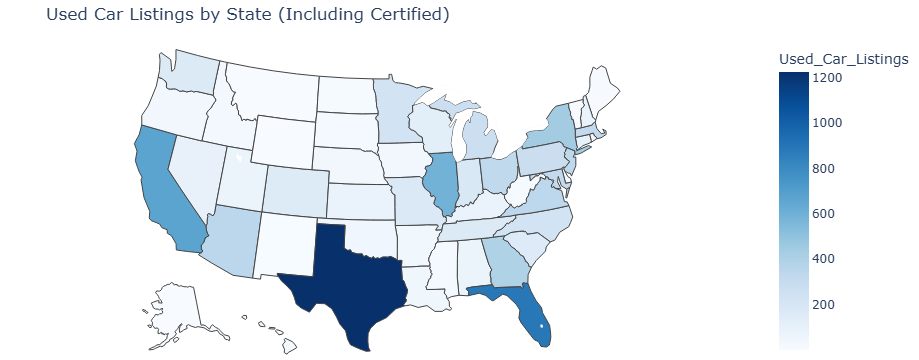

In [126]:
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv("Online_Cars_Sale_Marketplace.csv")

# Clean 'Used/New' column
df['Used/New'] = df['Used/New'].str.strip()
df['Used/New'] = df['Used/New'].replace(r'(?i).*certified.*', 'Certified', regex=True)

# Filter out missing state or listing type
df = df.dropna(subset=['Used/New', 'State'])
df_used = df[df['Used/New'].isin(['Used', 'Certified'])].copy()
df_used['Ownership'] = 'Used'

# Group by state
used_by_state = df_used.groupby('State').size().reset_index(name='Used_Car_Listings')

# ✅ Create U.S. state map
fig = px.choropleth(
    used_by_state,
    locations='State',             # column with state codes (e.g. TX, CA)
    locationmode='USA-states',     # tells plotly to treat 'State' as state abbreviations
    color='Used_Car_Listings',     # variable to color by
    scope='usa',                   # limit map to USA
    color_continuous_scale='Blues',  # color scale
    title='Used Car Listings by State (Including Certified)'
)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()



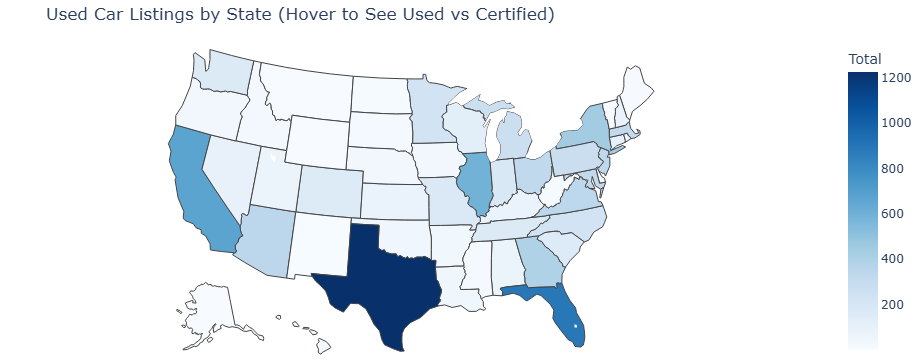

In [128]:
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv("Online_Cars_Sale_Marketplace.csv")

# Clean 'Used/New' column
df['Used/New'] = df['Used/New'].str.strip()
df['Used/New'] = df['Used/New'].replace(r'(?i).*certified.*', 'Certified', regex=True)

# Filter out missing state or listing type
df = df.dropna(subset=['Used/New', 'State'])
df = df[df['Used/New'].isin(['Used', 'Certified'])]

# Group by State and Used/New
grouped = df.groupby(['State', 'Used/New']).size().reset_index(name='Count')

# Pivot to have 'Used' and 'Certified' as separate columns
pivot_df = grouped.pivot(index='State', columns='Used/New', values='Count').fillna(0).reset_index()

# Add a total column for color intensity
pivot_df['Total'] = pivot_df['Used'] + pivot_df['Certified']

# Plot choropleth map with hover info for Used & Certified
fig = px.choropleth(
    pivot_df,
    locations='State',
    locationmode='USA-states',
    color='Total',
    scope='usa',
    color_continuous_scale='Blues',
    hover_name='State',
    hover_data={
        'Used': True,
        'Certified': True,
        'Total': True,
        'State': False  # Hide since it's already shown as the name
    },
    title='Used Car Listings by State (Hover to See Used vs Certified)'
)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


In [153]:
import pandas as pd

# Load dataset
df = pd.read_csv("Online_Cars_Sale_Marketplace.csv")

# Clean 'Used/New' column
df['Used/New'] = df['Used/New'].str.strip()
df['Used/New'] = df['Used/New'].replace(r'(?i).*certified.*', 'Certified', regex=True)

# Drop missing values
df = df.dropna(subset=['Used/New', 'State'])
df = df[df['Used/New'].isin(['Used', 'Certified'])]

# Group and pivot by State and Type
grouped = df.groupby(['State', 'Used/New']).size().reset_index(name='Count')
pivot_df = grouped.pivot(index='State', columns='Used/New', values='Count').fillna(0).reset_index()

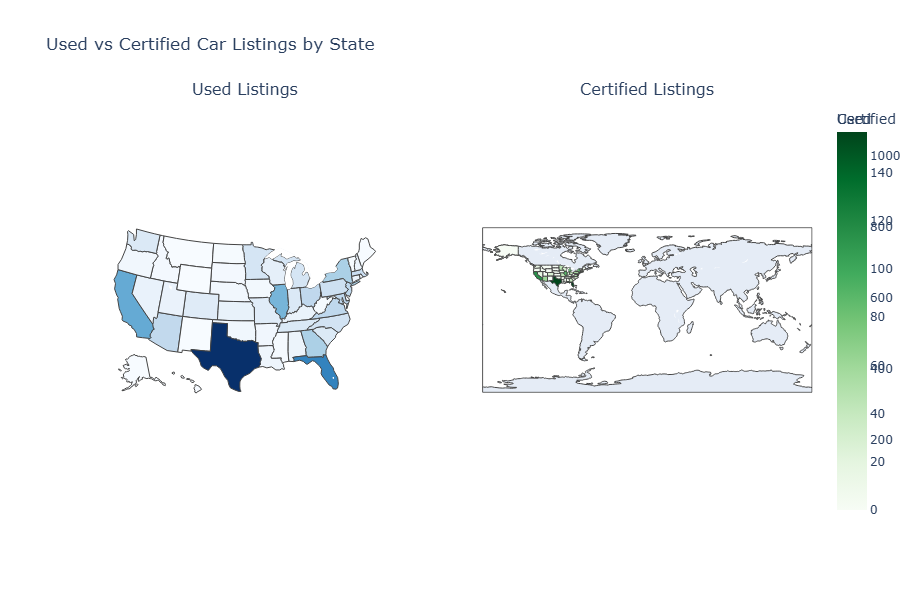

In [155]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create figure with 2 choropleth subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Used Listings", "Certified Listings"),
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]]
)

# Used Map
fig.add_trace(
    go.Choropleth(
        locations=pivot_df['State'],
        z=pivot_df['Used'],
        locationmode='USA-states',
        colorscale='Blues',
        colorbar_title="Used",
        name="Used"
    ),
    row=1, col=1
)

# Certified Map
fig.add_trace(
    go.Choropleth(
        locations=pivot_df['State'],
        z=pivot_df['Certified'],
        locationmode='USA-states',
        colorscale='Greens',
        colorbar_title="Certified",
        name="Certified"
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Used vs Certified Car Listings by State",
    geo_scope='usa',
    height=600,
    width=1000
)

fig.show()


In [110]:
import pandas as pd

# Load and prep dataset
df = pd.read_csv("Online_Cars_Sale_Marketplace.csv")

# Clean 'Used/New' column
df['Used/New'] = df['Used/New'].str.strip()
df['Used/New'] = df['Used/New'].replace(
    to_replace=r'(?i).*certified.*', value='Certified', regex=True
)

# Drop rows missing Used/New or location data
df = df.dropna(subset=['Used/New', 'Zipcode', 'State'])

# Filter for Used + Certified listings
df_used = df[df['Used/New'].isin(['Used', 'Certified'])].copy()

# Create ownership label for uniformity
df_used['Ownership'] = 'Used'

# Group by both Zipcode and State
used_by_zip_state = df_used.groupby(['Zipcode', 'State']).size().reset_index(name='Used_Car_Listings')

# Sort by number of listings
used_by_zip_state_sorted = used_by_zip_state.sort_values(by='Used_Car_Listings', ascending=False)

# Show top 10 zip-state combos
print(used_by_zip_state_sorted.head(20))


     Zipcode State  Used_Car_Listings
1644   76051    TX                 69
1601   75093    TX                 65
561    30096    GA                 63
527    29607    SC                 48
1581   75034    TX                 46
320    20852    MD                 43
1340   60540    IL                 42
1896   85260    AZ                 39
1612   75209    TX                 38
1868   84115    UT                 35
372    22182    VA                 34
1944   89146    NV                 33
302     2062    MA                 32
700    33181    FL                 31
287    20151    VA                 31
1342   60559    IL                 31
1899   85284    AZ                 30
555    30076    GA                 30
291    20166    VA                 30
1590   75062    TX                 29


In [112]:
# Group by Zipcode and State
used_by_zip_state = df_used.groupby(['Zipcode', 'State']).size().reset_index(name='Used_Car_Listings')

# Sort to get top ZIP codes
used_by_zip_state_sorted = used_by_zip_state.sort_values(by='Used_Car_Listings', ascending=False)

# Define top 20 ZIP -> City mapping
zip_city_map = {
    76051: 'Grapevine', 75093: 'Plano', 30096: 'Duluth', 29607: 'Greenville', 75034: 'Frisco',
    20852: 'Rockville', 60540: 'Naperville', 85260: 'Scottsdale', 75209: 'Dallas', 84115: 'Salt Lake City',
    22182: 'Vienna', 89146: 'Las Vegas', 2062: 'Norwood', 33181: 'North Miami', 20151: 'Chantilly',
    60559: 'Westmont', 85284: 'Tempe', 30076: 'Roswell', 20166: 'Sterling', 75062: 'Irving'
}

# Clean Zipcode column and filter top 20 ZIP codes
used_by_zip_state_sorted['Zipcode'] = used_by_zip_state_sorted['Zipcode'].astype(str)
used_by_zip_state_sorted = used_by_zip_state_sorted[used_by_zip_state_sorted['Zipcode'].str.isnumeric()]
used_by_zip_state_sorted['Zipcode'] = used_by_zip_state_sorted['Zipcode'].astype(int)

# Filter to only top 20 ZIP codes
top_20_zips = list(zip_city_map.keys())
used_top20 = used_by_zip_state_sorted[used_by_zip_state_sorted['Zipcode'].isin(top_20_zips)].copy()

# Add City column
used_top20['City'] = used_top20['Zipcode'].apply(lambda z: zip_city_map.get(z, 'not calculated'))

# Preview
print(used_top20[['Zipcode', 'State', 'City', 'Used_Car_Listings']].sort_values(by='Used_Car_Listings', ascending=False))


      Zipcode State            City  Used_Car_Listings
1644    76051    TX       Grapevine                 69
1601    75093    TX           Plano                 65
561     30096    GA          Duluth                 63
527     29607    SC      Greenville                 48
1581    75034    TX          Frisco                 46
320     20852    MD       Rockville                 43
1340    60540    IL      Naperville                 42
1896    85260    AZ      Scottsdale                 39
1612    75209    TX          Dallas                 38
1868    84115    UT  Salt Lake City                 35
372     22182    VA          Vienna                 34
1944    89146    NV       Las Vegas                 33
302      2062    MA         Norwood                 32
700     33181    FL     North Miami                 31
287     20151    VA       Chantilly                 31
1342    60559    IL        Westmont                 31
1899    85284    AZ           Tempe                 30
555     30

In [114]:

# !pip install uszipcode
# # Install once (you can skip this line after first install)
# # !pip install uszipcode

# from uszipcode import SearchEngine
# search = SearchEngine(simple_zipcode=True)

# # Make sure ZIP is string for lookup
# df_used['Zipcode'] = df_used['Zipcode'].astype(str)

# # Define city lookup function
# def get_city(zipcode):
#     result = search.by_zipcode(zipcode)
#     return result.major_city if result and result.major_city else 'not found'

# # Apply city lookup to all rows
# df_used['City'] = df_used['Zipcode'].apply(get_city)


In [116]:
# pip uninstall uszipcode sqlalchemy_mate -y
# pip install uszipcode==0.2.6 sqlalchemy_mate==1.4.0


In [118]:
# import pandas as pd
# import plotly.express as px

# # Top 20 ZIPs with city and coordinates
# data = [
#     (76051, 'Grapevine', 32.9343, -97.0781, 69),
#     (75093, 'Plano', 33.0347, -96.8311, 65),
#     (30096, 'Duluth', 34.0029, -84.1472, 63),
#     (29607, 'Greenville', 34.8256, -82.3402, 48),
#     (75034, 'Frisco', 33.1507, -96.8236, 46),
#     (20852, 'Rockville', 39.059, -77.1198, 43),
#     (60540, 'Naperville', 41.764, -88.149, 42),
#     (85260, 'Scottsdale', 33.5963, -111.8915, 39),
#     (75209, 'Dallas', 32.8462, -96.8269, 38),
#     (84115, 'Salt Lake City', 40.723, -111.8927, 35),
#     (22182, 'Vienna', 38.9222, -77.2565, 34),
#     (89146, 'Las Vegas', 36.1398, -115.2337, 33),
#     (2062, 'Norwood', 42.1854, -71.1995, 32),
#     (33181, 'North Miami', 25.897, -80.154, 31),
#     (20151, 'Chantilly', 38.8912, -77.4446, 31),
#     (60559, 'Westmont', 41.7942, -87.9767, 31),
# #     (85284, 'Tempe', 33.339, -111.9293, 30),
#     (30076, 'Roswell', 34.033, -84.3175, 30),
#     (20166, 'Sterling', 39.0022, -77.4291, 30),
#     (75062, 'Irving', 32.8466, -96.9847, 29)
# ]

# df_map = pd.DataFrame(data, columns=['Zipcode', 'City', 'Latitude', 'Longitude', 'Used_Car_Listings'])

# # Plot using Plotly
# fig = px.scatter_mapbox(
#     df_map,
#     lat="Latitude",
#     lon="Longitude",
#     hover_name="City",
#     hover_data=["Zipcode", "Used_Car_Listings"],
#     size="Used_Car_Listings",
#     color="Used_Car_Listings",
#     color_continuous_scale="Viridis",
#     size_max=30,
#     zoom=3
# )

# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(title="Top 20 ZIP Codes with Most Used Car Listings")
# fig.show()


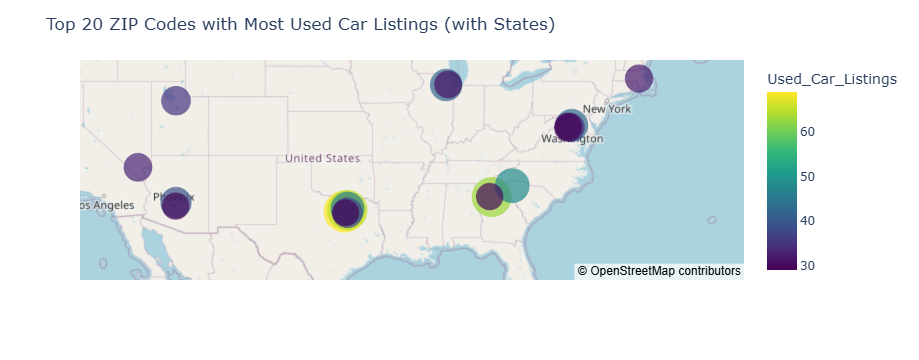

In [120]:
import pandas as pd
import plotly.express as px

# Top 20 ZIPs with City, State, Coordinates, and Listings
data = [
    (76051, 'Grapevine', 'TX', 32.9343, -97.0781, 69),
    (75093, 'Plano', 'TX', 33.0347, -96.8311, 65),
    (30096, 'Duluth', 'GA', 34.0029, -84.1472, 63),
    (29607, 'Greenville', 'SC', 34.8256, -82.3402, 48),
    (75034, 'Frisco', 'TX', 33.1507, -96.8236, 46),
    (20852, 'Rockville', 'MD', 39.059, -77.1198, 43),
    (60540, 'Naperville', 'IL', 41.764, -88.149, 42),
    (85260, 'Scottsdale', 'AZ', 33.5963, -111.8915, 39),
    (75209, 'Dallas', 'TX', 32.8462, -96.8269, 38),
    (84115, 'Salt Lake City', 'UT', 40.723, -111.8927, 35),
    (22182, 'Vienna', 'VA', 38.9222, -77.2565, 34),
    (89146, 'Las Vegas', 'NV', 36.1398, -115.2337, 33),
    (2062, 'Norwood', 'MA', 42.1854, -71.1995, 32),
    (33181, 'North Miami', 'FL', 25.897, -80.154, 31),
    (20151, 'Chantilly', 'VA', 38.8912, -77.4446, 31),
    (60559, 'Westmont', 'IL', 41.7942, -87.9767, 31),
    (85284, 'Tempe', 'AZ', 33.339, -111.9293, 30),
    (30076, 'Roswell', 'GA', 34.033, -84.3175, 30),
    (20166, 'Sterling', 'VA', 39.0022, -77.4291, 30),
    (75062, 'Irving', 'TX', 32.8466, -96.9847, 29)
]

# Create DataFrame
df_map = pd.DataFrame(data, columns=['Zipcode', 'City', 'State', 'Latitude', 'Longitude', 'Used_Car_Listings'])

# Plot using Plotly
fig = px.scatter_mapbox(
    df_map,
    lat="Latitude",
    lon="Longitude",
    hover_name="City",
    hover_data=["State", "Zipcode", "Used_Car_Listings"],
    size="Used_Car_Listings",
    color="Used_Car_Listings",
    color_continuous_scale="Viridis",
    size_max=30,
    zoom=3
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Top 20 ZIP Codes with Most Used Car Listings (with States)")
fig.show()


In [122]:
# import pandas as pd
# import plotly.express as px

# # Top 20 ZIPs with City, State, Coordinates, and Listings
# data = [
#     (76051, 'Grapevine', 'TX', 32.9343, -97.0781, 69),
#     (75093, 'Plano', 'TX', 33.0347, -96.8311, 65),
#     (30096, 'Duluth', 'GA', 34.0029, -84.1472, 63),
#     (29607, 'Greenville', 'SC', 34.8256, -82.3402, 48),
#     (75034, 'Frisco', 'TX', 33.1507, -96.8236, 46),
#     (20852, 'Rockville', 'MD', 39.059, -77.1198, 43),
#     (60540, 'Naperville', 'IL', 41.764, -88.149, 42),
#     (85260, 'Scottsdale', 'AZ', 33.5963, -111.8915, 39),
#     (75209, 'Dallas', 'TX', 32.8462, -96.8269, 38),
#     (84115, 'Salt Lake City', 'UT', 40.723, -111.8927, 35),
#     (22182, 'Vienna', 'VA', 38.9222, -77.2565, 34),
#     (89146, 'Las Vegas', 'NV', 36.1398, -115.2337, 33),
#     (2062, 'Norwood', 'MA', 42.1854, -71.1995, 32),
# #     (33181, 'North Miami', 'FL', 25.897, -80.154, 31),
#     (20151, 'Chantilly', 'VA', 38.8912, -77.4446, 31),
#     (60559, 'Westmont', 'IL', 41.7942, -87.9767, 31),
#     (85284, 'Tempe', 'AZ', 33.339, -111.9293, 30),
#     (30076, 'Roswell', 'GA', 34.033, -84.3175, 30),
#     (20166, 'Sterling', 'VA', 39.0022, -77.4291, 30),
#     (75062, 'Irving', 'TX', 32.8466, -96.9847, 29)
# ]

# # Create DataFrame
# df_map = pd.DataFrame(data, columns=['Zipcode', 'City', 'State', 'Latitude', 'Longitude', 'Used_Car_Listings'])

# # Create the map using scatter_geo (better spacing)
# fig = px.scatter_geo(
# #     df_map,
#     lat="Latitude",
#     lon="Longitude",
#     hover_name="City",
#     hover_data=["State", "Zipcode", "Used_Car_Listings"],
#     size="Used_Car_Listings",
#     color="Used_Car_Listings",
#     color_continuous_scale="Viridis",
#     projection="natural earth",
#     scope="usa"
# )

# # Update layout
# fig.update_layout(
#     title="Top 20 ZIP Codes with Most Used Car Listings (Less Overlap)",
#     geo=dict(showland=True)
# )

# # Show the map
# fig.show()


In [144]:
# import pandas as pd
# import plotly.express as px

# # Top 20 ZIPs with City, State, Coordinates, and Listings
# data = [
#     (76051, 'Grapevine', 'TX', 32.9343, -97.0781, 69),
#     (75093, 'Plano', 'TX', 33.0347, -96.8311, 65),
#     (30096, 'Duluth', 'GA', 34.0029, -84.1472, 63),
#     (29607, 'Greenville', 'SC', 34.8256, -82.3402, 48),
#     (75034, 'Frisco', 'TX', 33.1507, -96.8236, 46),
# #     (20852, 'Rockville', 'MD', 39.059, -77.1198, 43),
# #     (60540, 'Naperville', 'IL', 41.764, -88.149, 42),
#     (85260, 'Scottsdale', 'AZ', 33.5963, -111.8915, 39),
#     (75209, 'Dallas', 'TX', 32.8462, -96.8269, 38),
#     (84115, 'Salt Lake City', 'UT', 40.723, -111.8927, 35),
#     (22182, 'Vienna', 'VA', 38.9222, -77.2565, 34),
#     (89146, 'Las Vegas', 'NV', 36.1398, -115.2337, 33),
#     (2062, 'Norwood', 'MA', 42.1854, -71.1995, 32),
#     (33181, 'North Miami', 'FL', 25.897, -80.154, 31),
#     (20151, 'Chantilly', 'VA', 38.8912, -77.4446, 31),
#     (60559, 'Westmont', 'IL', 41.7942, -87.9767, 31),
#     (85284, 'Tempe', 'AZ', 33.339, -111.9293, 30),
#     (30076, 'Roswell', 'GA', 34.033, -84.3175, 30),
#     (20166, 'Sterling', 'VA', 39.0022, -77.4291, 30),
# #     (75062, 'Irving', 'TX', 32.8466, -96.9847, 29)
# # ]

# # # Create DataFrame
# # df_map = pd.DataFrame(data, columns=['Zipcode', 'City', 'State', 'Latitude', 'Longitude', 'Used_Car_Listings'])

# # Drop any rows with missing values (just in case)
# df_map = df_map.dropna(subset=["Latitude", "Longitude", "Used_Car_Listings"])

# # Create the map
# fig = px.scatter_geo(
#     df_map,
#     lat="Latitude",
#     lon="Longitude",
#     hover_name="City",
#     hover_data=["State", "Zipcode", "Used_Car_Listings"],
#     size="Used_Car_Listings",
#     color="Used_Car_Listings",
# #     color_continuous_scale="Viridis",
#     projection="natural earth",
#     scope="usa"
# )

# # Update layout
# fig.update_layout(
#     title="Top 20 ZIP Codes with Most Used Car Listings (Less Overlap)",
#     geo=dict(showland=True)
# )

# # Show the map
# fig.show()



In [138]:
# import pandas as pd
# import plotly.express as px

# # Top ZIPs with City, State, Lat/Lon, and Listings
# data = [
#     (76051, 'Grapevine', 'TX', 32.9343, -97.0781, 69),
#     (75093, 'Plano', 'TX', 33.0347, -96.8311, 65),
#     (30096, 'Duluth', 'GA', 34.0029, -84.1472, 63),
#     (29607, 'Greenville', 'SC', 34.8256, -82.3402, 48),
#     (75034, 'Frisco', 'TX', 33.1507, -96.8236, 46),
#     (20852, 'Rockville', 'MD', 39.059, -77.1198, 43),
#     (60540, 'Naperville', 'IL', 41.764, -88.149, 42),
#     (85260, 'Scottsdale', 'AZ', 33.5963, -111.8915, 39),
#     (75209, 'Dallas', 'TX', 32.8462, -96.8269, 38),
#     (84115, 'Salt Lake City', 'UT', 40.723, -111.8927, 35),
#     (22182, 'Vienna', 'VA', 38.9222, -77.2565, 34),
#     (89146, 'Las Vegas', 'NV', 36.1398, -115.2337, 33),
#     (2062, 'Norwood', 'MA', 42.1854, -71.1995, 32),
#     (33181, 'North Miami', 'FL', 25.897, -80.154, 31),
#     (20151, 'Chantilly', 'VA', 38.8912, -77.4446, 31),
#     (60559, 'Westmont', 'IL', 41.7942, -87.9767, 31),
#     (85284, 'Tempe', 'AZ', 33.339, -111.9293, 30),
#     (30076, 'Roswell', 'GA', 34.033, -84.3175, 30),
#     (20166, 'Sterling', 'VA', 39.0022, -77.4291, 30),
#     (75062, 'Irving', 'TX', 32.8466, -96.9847, 29)
# ]

# # Create DataFrame
# df_zip_map = pd.DataFrame(data, columns=['Zipcode', 'City', 'State', 'Latitude', 'Longitude', 'Used_Car_Listings'])

# # Plot bubble map
# fig = px.scatter_geo(
#     df_zip_map,
#     lat="Latitude",
#     lon="Longitude",
#     hover_name="City",
#     hover_data=["State", "Zipcode", "Used_Car_Listings"],
#     size="Used_Car_Listings",
#     color="Used_Car_Listings",
#     color_continuous_scale="Viridis",
#     projection="natural earth",
#     scope="usa",
#     size_max=25
# )

# fig.update_layout(
#     title="Bubble Map: Top ZIP Codes by Used Car Listings",
#     geo=dict(showland=True),
#     margin={"r":0,"t":40,"l":0,"b":0}
# )

# fig.show()


In [140]:
# # Ensure correct types
# df_zip_map = df_zip_map.dropna(subset=["Latitude", "Longitude", "Used_Car_Listings"])
# df_zip_map = df_zip_map.astype({
#     "Latitude": float,
#     "Longitude": float,
#     "Used_Car_Listings": int
# })


In [142]:
# import pandas as pd
# import plotly.express as px

# # ZIP data
# data = [
#     (76051, 'Grapevine', 'TX', 32.9343, -97.0781, 69),
#     (75093, 'Plano', 'TX', 33.0347, -96.8311, 65),
#     (30096, 'Duluth', 'GA', 34.0029, -84.1472, 63),
#     (29607, 'Greenville', 'SC', 34.8256, -82.3402, 48),
#     (75034, 'Frisco', 'TX', 33.1507, -96.8236, 46),
#     (20852, 'Rockville', 'MD', 39.059, -77.1198, 43),
#     (60540, 'Naperville', 'IL', 41.764, -88.149, 42),
#     (85260, 'Scottsdale', 'AZ', 33.5963, -111.8915, 39),
#     (75209, 'Dallas', 'TX', 32.8462, -96.8269, 38),
#     (84115, 'Salt Lake City', 'UT', 40.723, -111.8927, 35),
#     (22182, 'Vienna', 'VA', 38.9222, -77.2565, 34),
#     (89146, 'Las Vegas', 'NV', 36.1398, -115.2337, 33),
#     (2062, 'Norwood', 'MA', 42.1854, -71.1995, 32),
#     (33181, 'North Miami', 'FL', 25.897, -80.154, 31),
#     (20151, 'Chantilly', 'VA', 38.8912, -77.4446, 31),
#     (60559, 'Westmont', 'IL', 41.7942, -87.9767, 31),
#     (85284, 'Tempe', 'AZ', 33.339, -111.9293, 30),
#     (30076, 'Roswell', 'GA', 34.033, -84.3175, 30),
#     (20166, 'Sterling', 'VA', 39.0022, -77.4291, 30),
#     (75062, 'Irving', 'TX', 32.8466, -96.9847, 29)
# ]

# # Create DataFrame
# df_zip_map = pd.DataFrame(data, columns=['Zipcode', 'City', 'State', 'Latitude', 'Longitude', 'Used_Car_Listings'])

# # ✅ Clean data to avoid JavaScript error
# df_zip_map = df_zip_map.dropna(subset=["Latitude", "Longitude", "Used_Car_Listings"])
# df_zip_map = df_zip_map.astype({
#     "Latitude": float,
#     "Longitude": float,
#     "Used_Car_Listings": int
# })

# # Plot
# fig = px.scatter_geo(
#     df_zip_map,
#     lat="Latitude",
#     lon="Longitude",
#     hover_name="City",
#     hover_data=["State", "Zipcode", "Used_Car_Listings"],
#     size="Used_Car_Listings",
#     color="Used_Car_Listings",
#     color_continuous_scale="Viridis",
#     projection="natural earth",
#     scope="usa",
#     size_max=25
# )

# fig.update_layout(
#     title="Bubble Map: Top ZIP Codes by Used Car Listings",
#     geo=dict(showland=True),
#     margin={"r":0,"t":40,"l":0,"b":0}
# )

# fig.show()
